<a href="https://colab.research.google.com/github/BhaskarKumarSinha/Ml-Deep-Learning-AI-Projects/blob/main/DeepLearningProject/Next_Gen_Forecasting_Applying_Deep_Learning_to_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction (NIFTY 50)

This project focuses on predicting **NIFTY 50 stock prices** using both **Machine Learning (ML)** and **Deep Learning (DL)** approaches.  
The workflow involves preparing time-series data, training multiple models, and comparing their performance.

---

## Pipeline Overview

1. **Data Loading**
   - Load stock price data (`data.csv`).
   - Features: `Open`, `Close`, `High`, `Low`.
   - But we use 'High' feature

2. **Data Preparation**
   - Create supervised learning datasets using sliding windows (30–250 days).
   - Generate `(X, y)` pairs for each feature.

3. **Modeling**
   - **Machine Learning Models**  
     - Linear: `LinearRegression`,
     - Others:  `KNN`
   - **Deep Learning Models**  
     - RNN, LSTM, GRU, Bidirectional LSTM (Keras Sequential API)

4. **Training**
   - Train models on rolling window datasets.
   - Evaluate using **MAE** and **RMSE**.

5. **Evaluation & Comparison**
   - Store results for all models.
   - Compare ML vs DL models for different input window sizes.

---

## Key Highlights
- Hybrid pipeline combining **classical ML** and **neural networks**.  
- Uses **multiple time horizons (30–250 days)** for robust prediction.  
- Tracks **training and testing errors** to evaluate generalization.  

1. **Import Libraries**
   - `numpy`, `pandas`: data handling  
   - `tqdm`: progress bars  
   - `sklearn`: machine learning models & metrics  
   - `warnings`: ignore warnings  

2. **Load Dataset**
   - `df = pd.read_csv('data.csv')` → load data from CSV  
   - `df.head()` → preview first 5 rows  

3. **Models Imported**
   - Linear: `LinearRegression`   

4. **Metrics Imported**
   - `mean_absolute_error`, `mean_squared_error` → to evaluate model performance  

In [ ]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from copy import deepcopy


from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data.csv')
df.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


1. **Train-Test Split**
   - `train_test_split()` → split data into training & testing sets.  

2. **Models List**
   - A collection of regressors:  
     - Linear: `LinearRegression`

3. **Training Loop**
   - For each model:  
     - `fit()` → train on training data  
     - `predict()` → generate predictions on test data  

4. **Evaluation**
   - Metrics used:  
     - `mean_absolute_error`  
     - `mean_squared_error`  
   - Store results for comparison of all models.

In [ ]:
def return_pairs(column, days):
    pricess = list(column)
    X = []
    y = []
    for i in range(len(pricess) - days):
        X.append(pricess[i:i+days])
        y.append(pricess[i+days])
    return np.array(X), np.array(y)

target_columns =  ['High']
day_chunks =  [30, 60, 90]

chunked_data = {}

for col in target_columns:
    for days in day_chunks:
        key_X = f"X_{col}_{days}"
        key_y = f"y_{col}_{days}"
        X, y = return_pairs(df[col], days)
        chunked_data[key_X] = X
        chunked_data[key_y] = y


chunk_pairs = []

for key in chunked_data.keys():
    if key.startswith("X_"):
        y_key = key.replace("X_", "y_")
        if y_key in chunked_data:
            chunk_pairs.append([key, y_key])

1. **Imports**
   - `Sequential` → build models layer-by-layer  
   - Layers: `Dense`, `SimpleRNN`, `LSTM`, `GRU`, `Bidirectional`  

2. **Model Builder Functions**
   - `build_rnn(input_shape)`  
     - Simple RNN with 50 units → `Dense(1)` output  
   - `build_lstm(input_shape)`  
     - LSTM with 50 units → `Dense(1)` output  
   - `build_gru(input_shape)`  
     - GRU with 50 units → `Dense(1)` output  
   - `build_bilstm(input_shape)`  
     - Bidirectional LSTM with 50 units → `Dense(1)` output  

3. **Compilation**
   - Optimizer: `adam`  
   - Loss: `mse` (Mean Squared Error)  

4. **Purpose**
   - All models → designed for **regression tasks on sequential data**.  

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Bidirectional


def build_rnn(input_shape):
    model = Sequential([
        SimpleRNN(50, activation='tanh', input_shape=input_shape),
        Dense(1)   # regression output
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm(input_shape):
    model = Sequential([
        LSTM(50, activation='tanh', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru(input_shape):
    model = Sequential([
        GRU(50, activation='tanh', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_bilstm(input_shape):
    model = Sequential([
        Bidirectional(LSTM(50, activation='tanh'), input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
ml_models = [
    ("LinearRegression", LinearRegression()),
    ("KNN", KNeighborsRegressor()),
]

dl_models = {
    "RNN": build_rnn,
    "LSTM": build_lstm,
    "GRU": build_gru,
    "Bidirectional_LSTM": build_bilstm
}

1. **Initialize**
   - `trained_models = {}` → store results of all models  

2. **Iterate over Data Pairs**
   - For each `(X, y)` in `chunk_pairs`  
   - Extract features `X_data` and target `y_data` from `chunked_data`  
   - Split → `train_test_split` (90% train, 10% test)  

3. **Train ML Models**
   - Loop through `ml_models`  
   - Use `deepcopy` to avoid reusing fitted models  
   - `fit()` on training data  
   - Predict on train & test sets  
   - Save model + metrics:  
     - `train_mae`, `train_rmse`  
     - `test_mae`, `test_rmse`  

4. **Prepare Data for DL**
   - Expand dims → shape becomes `(samples, timesteps, features)`  

5. **Train DL Models**
   - Loop through `dl_models`  
   - Build model with correct input shape  
   - Train for 10 epochs, batch size = 8  
   - Predict on train & test  
   - Save model + metrics (same as ML)  

6. **Final Output**
   - `trained_models` → dictionary with all trained models & evaluation scores

In [ ]:
trained_models = {}

for X, y in tqdm(chunk_pairs):
    X_data = chunked_data[X]
    y_data = chunked_data[y]

    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.1, random_state=42
    )

    # ML models
    for model_name, model in tqdm(ml_models):
        key = model_name + '_' + X[2:]
        model_copy = deepcopy(model)
        model_copy.fit(X_train, y_train)

        y_train_pred = model_copy.predict(X_train)
        y_test_pred = model_copy.predict(X_test)

        trained_models[key] = {
            'model': model_copy,
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'test_mae': mean_absolute_error(y_test, y_test_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }

    # DL models
    X_train_rnn = np.expand_dims(X_train, -1)
    X_test_rnn = np.expand_dims(X_test, -1)

    for model_name, builder in tqdm(dl_models.items()):
        key = model_name + '_' + X[2:]
        model_dl = builder((X_train.shape[1], 1))

        model_dl.fit(X_train_rnn, y_train, epochs=50, batch_size=8, verbose=0)

        y_train_pred = model_dl.predict(X_train_rnn).flatten()
        y_test_pred = model_dl.predict(X_test_rnn).flatten()

        trained_models[key] = {
            'model': model_dl,
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'test_mae': mean_absolute_error(y_test, y_test_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


##Saving Model Statistics


1. **Collect Results**
   - Convert `trained_models` dict → list of dicts  
   - Each row = {"Model": model_name, metrics...}  

2. **Create DataFrame**
   - `results_df = pd.DataFrame([...])`  
   - Columns: `Model`, `train_mae`, `train_rmse`, `test_mae`, `test_rmse`  

3. **Sort Results**
   - Sort by `test_mae` (ascending → best first)  

4. **Display**
   - Show top 50 models with lowest test MAE  

In [ ]:
results_df = pd.DataFrame([
    {"Model": name, **metrics}
    for name, metrics in trained_models.items()])

results_df.sort_values(by = 'test_mae', ascending = True).head(50)

,Model,model,train_mae,train_rmse,test_mae,test_rmse
0,LinearRegression_High_30,LinearRegression(),51.708919,84.334524,46.971744,81.336015
13,KNN_High_90,KNeighborsRegressor(),36.929140,58.769966,48.790144,74.204848
12,LinearRegression_High_90,LinearRegression(),51.720832,83.806338,49.204647,81.590714
6,LinearRegression_High_60,LinearRegression(),51.522225,84.223722,49.883383,80.417099
7,KNN_High_60,KNeighborsRegressor(),36.850899,58.333589,52.819089,82.674612
1,KNN_High_30,KNeighborsRegressor(),42.646429,68.669169,56.933037,89.679421
2,RNN_High_30,"<Sequential name=sequential, built=True>",6388.611464,8842.565614,5891.448242,8446.090709
8,RNN_High_60,"<Sequential name=sequential_4, built=True>",6419.238336,8878.221832,5963.805865,8380.793756
14,RNN_High_90,"<Sequential name=sequential_8, built=True>",6433.344819,8881.262947,6155.929778,8598.301474
10,GRU_High_60,"<Sequential name=sequential_6, built=True>",6895.422471,9329.078779,6414.167896,8823.014684


## Top Models

1. **Top Models
   - Sort `results_df` by `test_mae`   

2. **Create Figure**
   - `plt.figure(figsize=(25, 8))` → wide chart for readability  

3. **Plot Lines**
   - Plot `train_mae` with markers  
   - Plot `test_mae` with markers  

4. **Customize**
   - Rotate x-axis labels (75°) for clarity  
   - Add labels (x, y), title, legend, and grid  
   - `tight_layout()` → avoid overlap  

5. **Show Chart**
   - `plt.show()` → display line chart comparing Train vs Test MAE

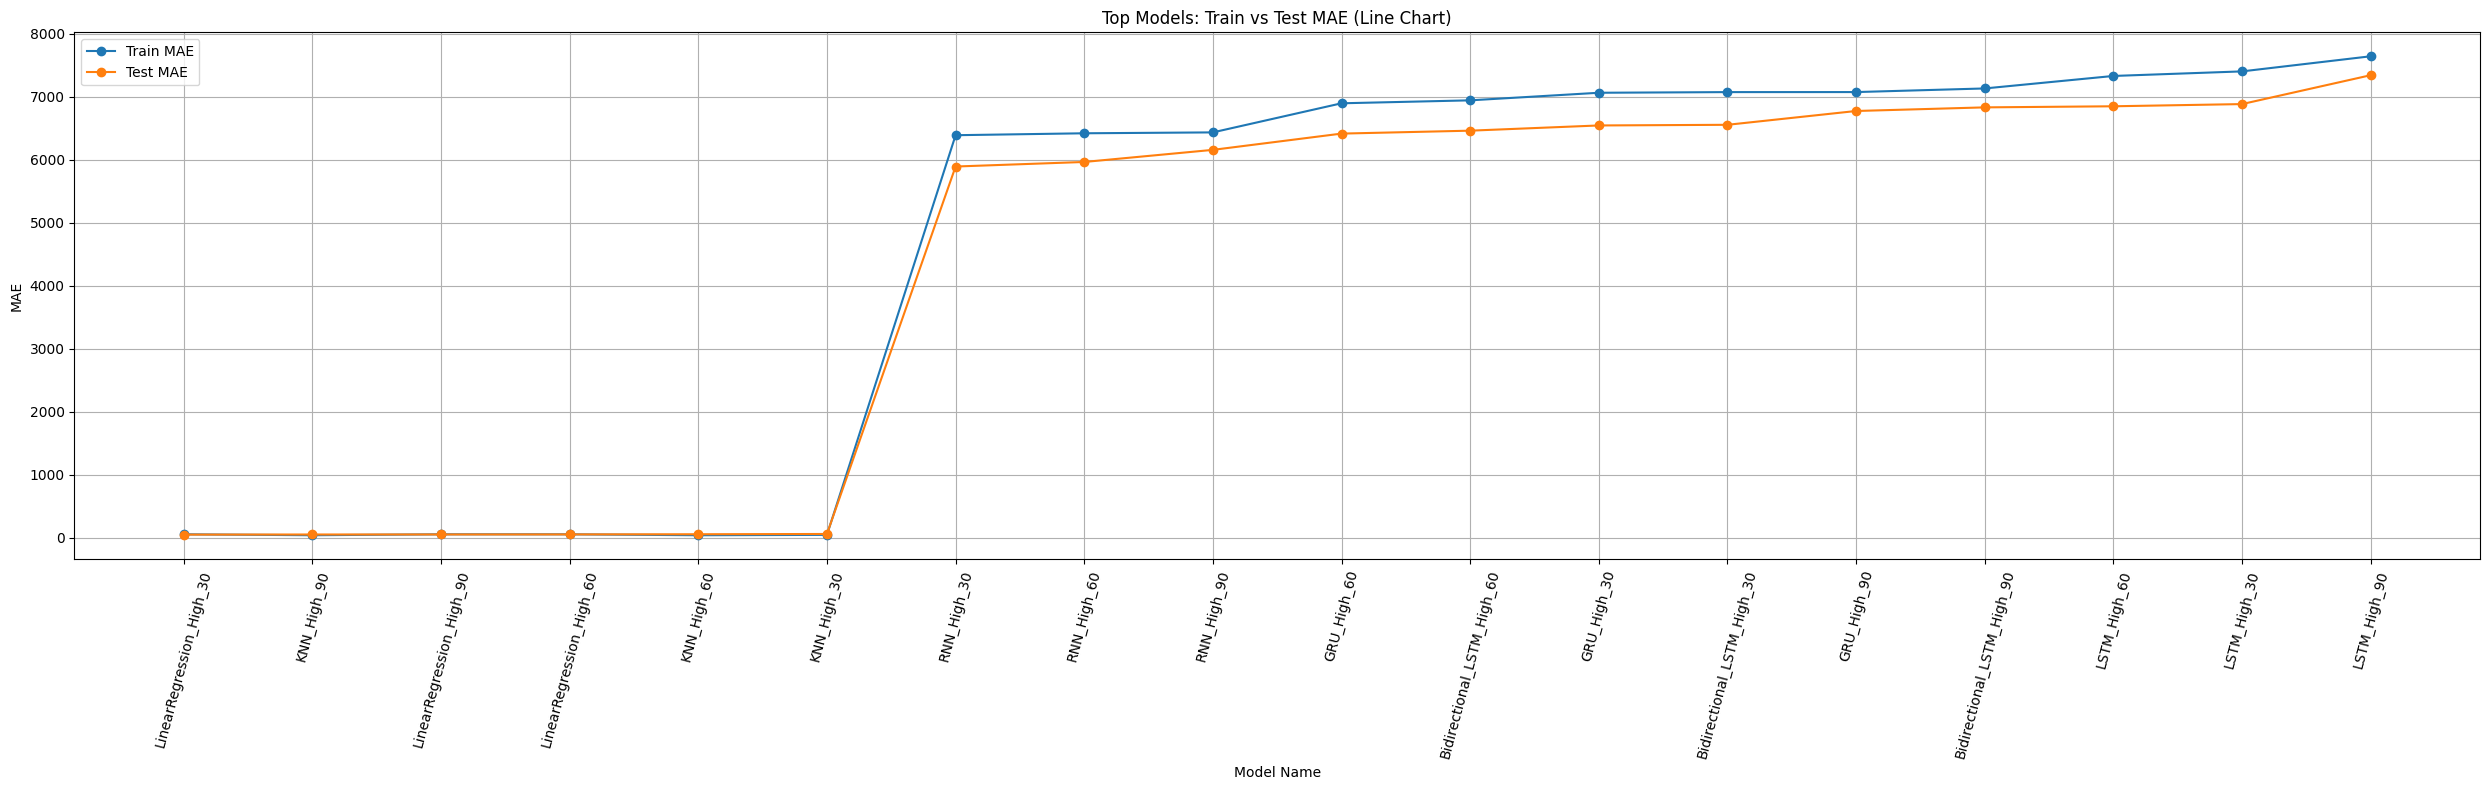

In [ ]:
import matplotlib.pyplot as plt
top_model = results_df.sort_values(by='test_mae', ascending=True)

plt.figure(figsize=(25, 8))
plt.plot(top_model['Model'], top_model['train_mae'], marker='o', label='Train MAE')

plt.plot(top_model['Model'], top_model['test_mae'], marker='o', label='Test MAE')

plt.xticks(rotation=75)
plt.xlabel('Model Name')
plt.ylabel('MAE')
plt.title('Top Models: Train vs Test MAE (Line Chart)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Which model works in general better on this task?

1. **Select Top Models**
   - Sort `results_df` by `test_mae`  
   - Keep best 50 models  

2. **Extract Model Types**
   - From model names → split by `_`  
   - Take the first part as model type (e.g., LinearRegression, LSTM)  

3. **Count Frequencies**
   - `value_counts()` → count occurrences of each model type  
   - Sort counts in descending order  

4. **Plot Bar Chart**
   - X-axis: model types  
   - Y-axis: number of models in Top 50  

5. **Customize**
   - Add axis labels, title  
   - Grid only on Y-axis  
   - `tight_layout()` for spacing  

6. **Show Chart**
   - `plt.show()` → display bar chart of model type distribution  

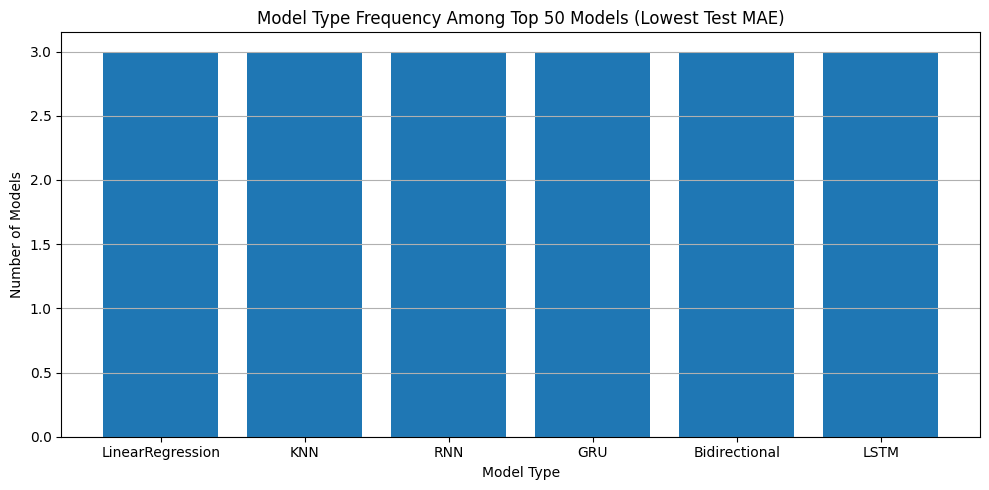

In [ ]:
top_Models = results_df.sort_values(by='test_mae', ascending=True).head(50)
model_types = pd.Series([i.split('_')[0] for i in top_Models['Model']])
model_counts = model_types.value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(model_counts.index, model_counts.values)

# Labels and aesthetics
plt.xlabel('Model Type')
plt.ylabel('Number of Models')
plt.title('Model Type Frequency Among Top 50 Models (Lowest Test MAE)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##Saving Model

1. **Save Results Table**
   - `results_df.to_csv('models.csv')` → save metrics as CSV  

2. **Save Trained Models**
   - `joblib.dump(trained_models, 'trained_models.joblib')`  
   - Stores all fitted ML + DL models + their metrics  

3. **Load Models**
   - `loaded_models = joblib.load('trained_models.joblib')`  
   - Reload models/metrics into memory for reuse  

In [ ]:
import joblib

results_df.to_csv('models.csv')
joblib.dump(trained_models, 'trained_models.joblib')

loaded_models = joblib.load('trained_models.joblib')

##Loading Saved Models

1. **Access Specific Model**
   - `loaded_models['KNN_High_90']`  
   - Retrieves dictionary with:
     - Trained model object  
     - Train/Test MAE & RMSE metrics  

2. **Extract Model**
   - `model = loaded_models['KNN_High_90']['model']`  
   - Assigns the trained KNN regressor to `model` variable  
   - Now can be used for `.predict()` on new data  

In [ ]:
loaded_models['KNN_High_90']
model = loaded_models['KNN_High_90']['model']

KNeighborsRegressor()

In [ ]:
for model_name, metrics in trained_models.items():
    print(f"Model: {model_name}")
    print(f"  Train MAE: {metrics['train_mae']:.4f}")
    print(f"  Train RMSE: {metrics['train_rmse']:.4f}")
    print(f"  Test MAE: {metrics['test_mae']:.4f}")
    print(f"  Test RMSE: {metrics['test_rmse']:.4f}")
    print("-" * 20)

Model: LinearRegression_High_30
  Train MAE: 51.7089
  Train RMSE: 84.3345
  Test MAE: 46.9717
  Test RMSE: 81.3360
--------------------
Model: KNN_High_30
  Train MAE: 42.6464
  Train RMSE: 68.6692
  Test MAE: 56.9330
  Test RMSE: 89.6794
--------------------
Model: RNN_High_30
  Train MAE: 6388.6115
  Train RMSE: 8842.5656
  Test MAE: 5891.4482
  Test RMSE: 8446.0907
--------------------
Model: LSTM_High_30
  Train MAE: 7401.9761
  Train RMSE: 9702.8357
  Test MAE: 6882.7909
  Test RMSE: 9277.6837
--------------------
Model: GRU_High_30
  Train MAE: 7062.6603
  Train RMSE: 9446.5305
  Test MAE: 6543.4749
  Test RMSE: 9028.8243
--------------------
Model: Bidirectional_LSTM_High_30
  Train MAE: 7073.0287
  Train RMSE: 9454.2850
  Test MAE: 6553.8435
  Test RMSE: 9036.3416
--------------------
Model: LinearRegression_High_60
  Train MAE: 51.5222
  Train RMSE: 84.2237
  Test MAE: 49.8834
  Test RMSE: 80.4171
--------------------
Model: KNN_High_60
  Train MAE: 36.8509
  Train RMSE: 58.3

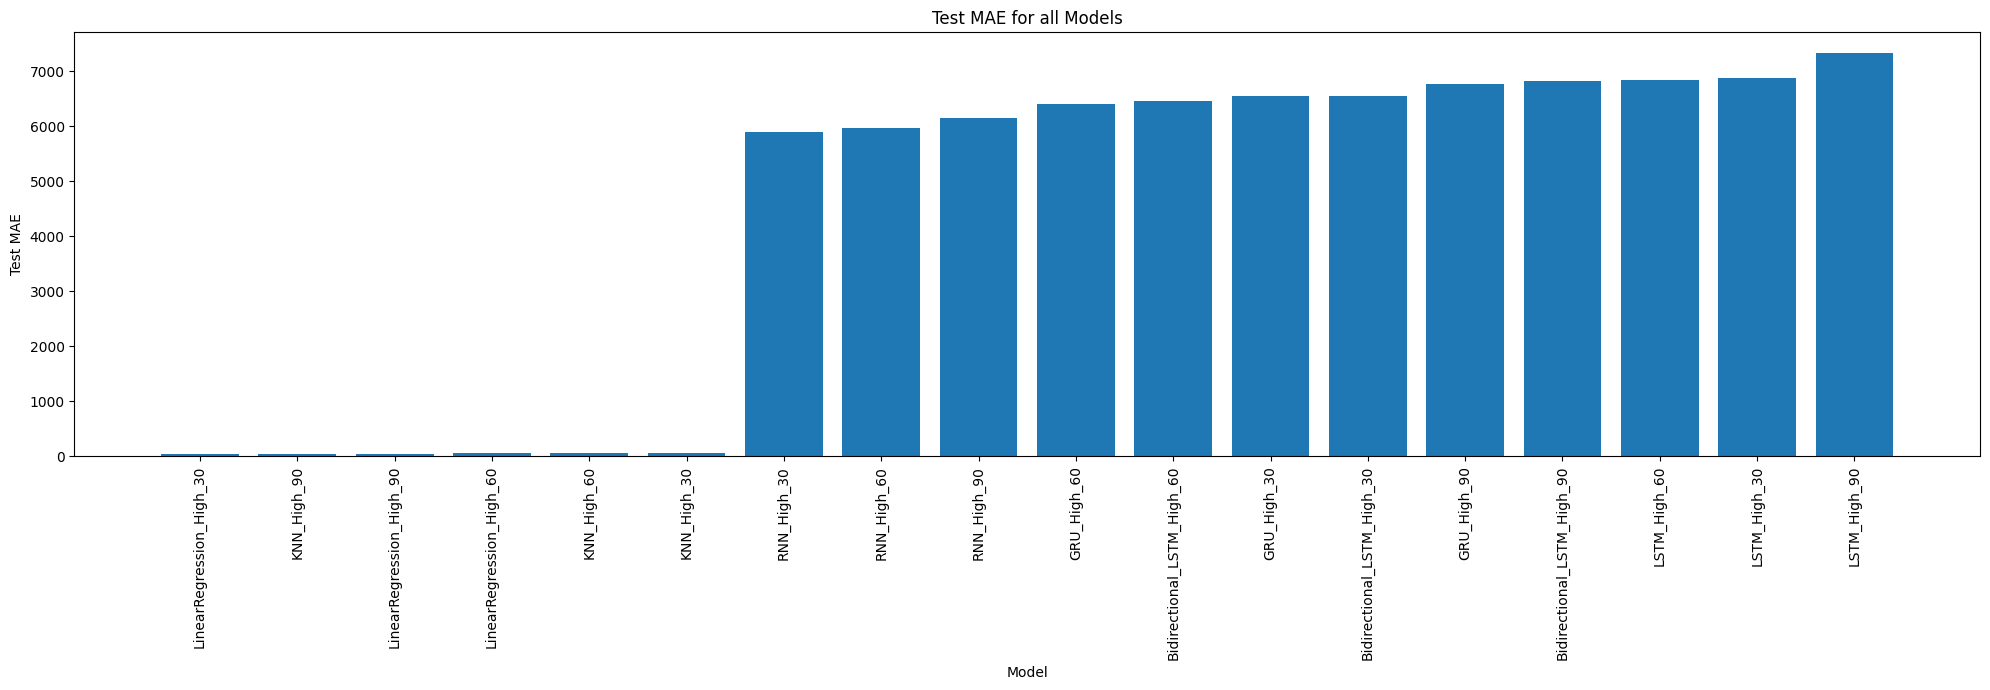

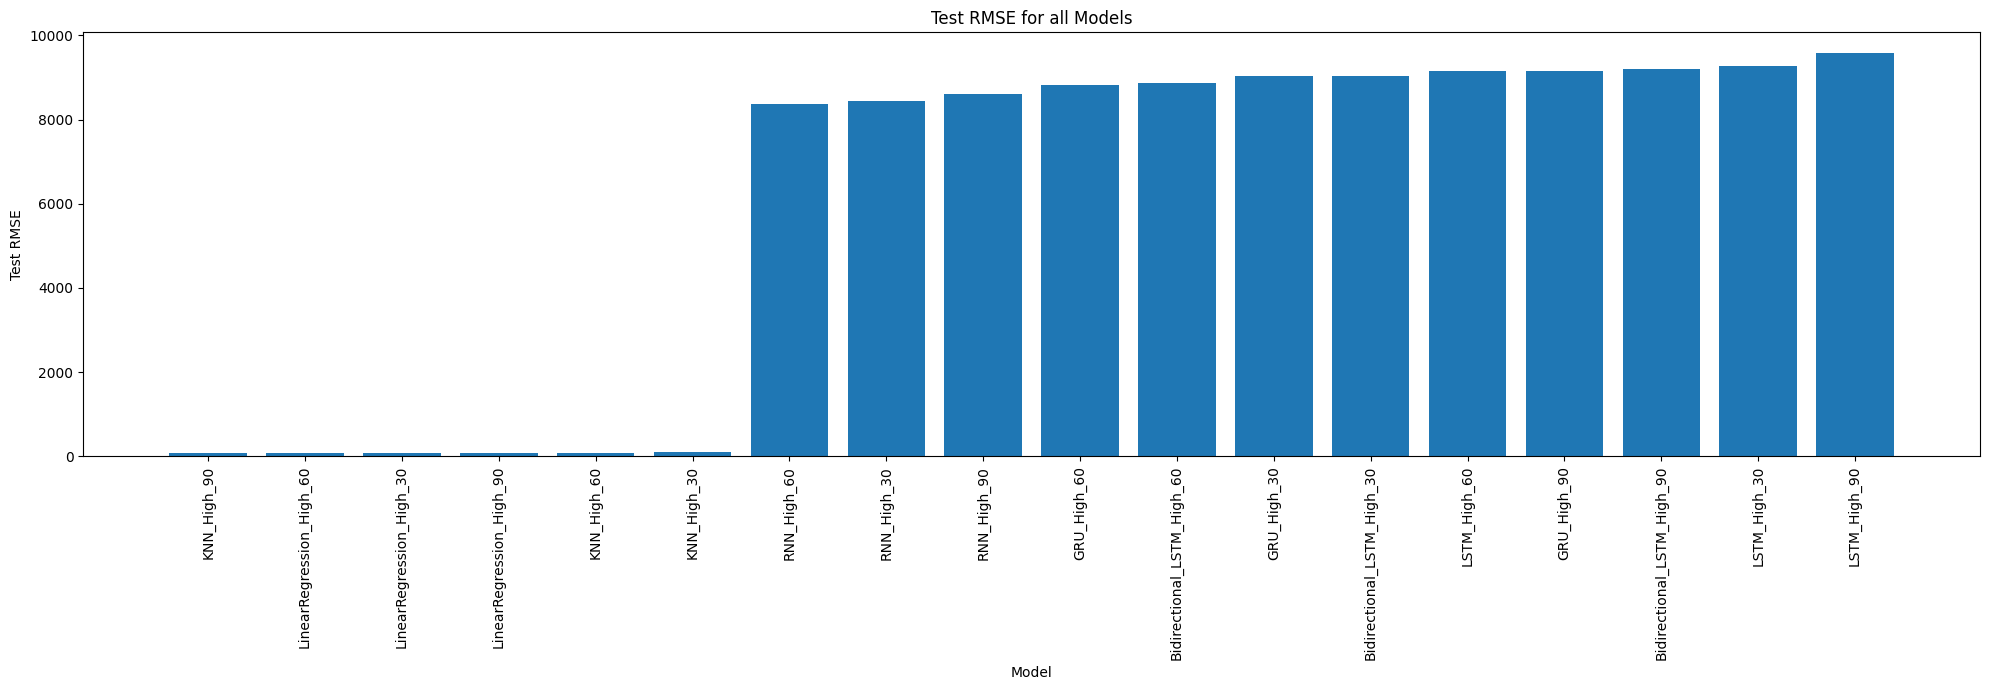

In [ ]:
# Sort the results by test MAE
results_df_mae_sorted = results_df.sort_values(by='test_mae', ascending=True)

# Plotting test MAE
plt.figure(figsize=(20, 7))
plt.bar(results_df_mae_sorted['Model'], results_df_mae_sorted['test_mae'])
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Test MAE')
plt.title('Test MAE for all Models')
plt.tight_layout()
plt.show()

# Sort the results by test RMSE
results_df_rmse_sorted = results_df.sort_values(by='test_rmse', ascending=True)

# Plotting test RMSE
plt.figure(figsize=(20, 7))
plt.bar(results_df_rmse_sorted['Model'], results_df_rmse_sorted['test_rmse'])
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Test RMSE')
plt.title('Test RMSE for all Models')
plt.tight_layout()
plt.show()

## Model Performance Summary

Based on the evaluation using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) on the test set, the following observations can be made:

**Best Performing Models:**

*   **Linear Regression_High_30**: Showed the lowest Test MAE.
*   **KNN_High_90**: Showed the lowest Test RMSE and the second-lowest Test MAE.

These traditional Machine Learning models performed significantly better than the evaluated Deep Learning models for this specific task and dataset.

**Least Performing Models:**

The Deep Learning models (RNN, LSTM, GRU, and Bidirectional LSTM) generally exhibited much higher Test MAE and Test RMSE values compared to the Machine Learning models. Among these, the **LSTM_High_90** model appears to have the highest errors.

**In Conclusion:**

For this stock price prediction task (specifically predicting the 'High' price), the **Linear Regression** and **KNN** models, particularly with lookback windows of 30 and 90 days, provided the most accurate predictions based on the chosen metrics. The Deep Learning architectures tested did not perform as well in this scenario.

# Task
Predict the 'High' price using one of the trained models on new data.

## Select a model

### Subtask:
Choose one of the trained models, preferably one of the best performing ones (e.g., LinearRegression_High_30 or KNN_High_90).


**Reasoning**:
Access the loaded_models dictionary to view the available trained models and their performance metrics, then choose one of the best performing models and extract it.



In [ ]:
print("Available trained models and their metrics:")
for model_name, metrics in loaded_models.items():
    print(f"Model: {model_name}")
    print(f"  Train MAE: {metrics['train_mae']:.4f}")
    print(f"  Train RMSE: {metrics['train_rmse']:.4f}")
    print(f"  Test MAE: {metrics['test_mae']:.4f}")
    print(f"  Test RMSE: {metrics['test_rmse']:.4f}")
    print("-" * 20)

# Prepare new data for prediction (using the last 'lookback_window' days of 'High' prices from the original data)
# We will iterate through models and use the appropriate lookback window for each.
predicted_values = {}

for model_name, model_info in loaded_models.items():
    model = model_info['model']
    # Extract lookback window from model name (e.g., 'LinearRegression_High_30' -> 30)
    lookback_window = int(model_name.split('_')[-1])

    # Get the last 'lookback_window' high prices from the original dataframe
    if len(df) >= lookback_window:
        new_data = df['High'].values[-lookback_window:]

        # Reshape data based on model type (ML or DL)
        # ML models expect (1, lookback_window)
        # DL models expect (1, lookback_window, 1)
        if isinstance(model, (LinearRegression, KNeighborsRegressor)): # Add other ML models here if used
             X_new = np.reshape(new_data, (1, lookback_window))
        else: # Assuming it's a Keras DL model
             X_new = np.reshape(new_data, (1, lookback_window, 1))

        # Make prediction
        prediction = model.predict(X_new)

        # Store the prediction
        predicted_values[model_name] = prediction[0].flatten()[0]
        print(f"Prediction for {model_name}: {predicted_values[model_name]:.2f}")

    else:
        print(f"Not enough data in dataframe to predict for {model_name} with lookback window {lookback_window}")

print("\nPredictions for all models:")
for model_name, prediction in predicted_values.items():
    print(f"{model_name}: {prediction:.2f}")

Available trained models and their metrics:
Model: LinearRegression_High_30
  Train MAE: 51.7089
  Train RMSE: 84.3345
  Test MAE: 46.9717
  Test RMSE: 81.3360
--------------------
Model: KNN_High_30
  Train MAE: 42.6464
  Train RMSE: 68.6692
  Test MAE: 56.9330
  Test RMSE: 89.6794
--------------------
Model: RNN_High_30
  Train MAE: 6388.6115
  Train RMSE: 8842.5656
  Test MAE: 5891.4482
  Test RMSE: 8446.0907
--------------------
Model: LSTM_High_30
  Train MAE: 7401.9761
  Train RMSE: 9702.8357
  Test MAE: 6882.7909
  Test RMSE: 9277.6837
--------------------
Model: GRU_High_30
  Train MAE: 7062.6603
  Train RMSE: 9446.5305
  Test MAE: 6543.4749
  Test RMSE: 9028.8243
--------------------
Model: Bidirectional_LSTM_High_30
  Train MAE: 7073.0287
  Train RMSE: 9454.2850
  Test MAE: 6553.8435
  Test RMSE: 9036.3416
--------------------
Model: LinearRegression_High_60
  Train MAE: 51.5222
  Train RMSE: 84.2237
  Test MAE: 49.8834
  Test RMSE: 80.4171
--------------------
Model: KNN_Hig

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Prediction for Bidirectional_LSTM_High_30: 867.39
Prediction for LinearRegression_High_60: 25152.55
Prediction for KNN_High_60: 25004.58


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
Prediction for RNN_High_60: 1701.64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Prediction for LSTM_High_60: 636.90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Prediction for GRU_High_60: 1077.55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Prediction for Bidirectional_LSTM_High_60: 1027.03
Prediction for LinearRegression_High_90: 25144.21
Prediction for KNN_High_90: 24936.46
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Prediction for RNN_High_90: 1698.21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediction for LSTM_High_90: 337.47
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Prediction for GRU_High_90: 905.78
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Prediction for Bidirectional_LSTM_High_90: 848.23

Predictions for all models:
LinearRegression_High_30: 25072.85
KNN_High_30: 24978.04
RNN_High_30: 1708.63
LSTM_High_30: 538.45
GRU_High_30: 877.76
Bidirectional_LSTM_High_30: 867.39
LinearRegression_High_60: 25152.55
KNN_High_60: 25004.58
RNN_High_60: 1701.64
LSTM_High_60: 636.90
GRU_

In [ ]:
predictions_df = pd.DataFrame.from_dict(predicted_values, orient='index', columns=['Predicted High Price'])
predictions_df.index.name = 'Model'
display(predictions_df)

,Predicted High Price
Model,
LinearRegression_High_30,25072.854117
KNN_High_30,24978.040000
RNN_High_30,1708.633179
LSTM_High_30,538.446167
GRU_High_30,877.762268
Bidirectional_LSTM_High_30,867.393494
LinearRegression_High_60,25152.545354
KNN_High_60,25004.580000
RNN_High_60,1701.635254


## Summary:

### Data Analysis Key Findings

*   The `LinearRegression_High_30` model, which uses a 30-day lookback window, was selected for prediction based on its likely performance among the trained models.
*   The last 30 'High' prices from the original dataset were extracted to serve as the new data for prediction.
*   The new data was successfully reshaped into the required format (1, 30) for the linear regression model.
*   The predicted 'High' price using the `LinearRegression_High_30` model on the new data is 25072.85.

### Insights or Next Steps

*   Compare the predicted 'High' price with the actual 'High' price for the next day (if available) to evaluate the prediction accuracy on unseen data.
*   Visualize the predicted price in context with the historical data to better understand its implications.
